<a href="https://colab.research.google.com/github/jiaying-l/Weather-Prediction-Project/blob/main/weather_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
#import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

---


#Import Data
Weather data from 2010-01-01 to 2022-12-31

In [2]:
#import files
from google.colab import files
uploaded = files.upload()

Saving Weather_data(2010-2022) - Sheet.csv to Weather_data(2010-2022) - Sheet.csv


In [3]:
raw_data = pd.read_csv("Weather_data(2010-2022) - Sheet.csv")



---


# Data Cleaning
### Basic Checking
- Double check data size
- Drop empty rows

### Problematic Columns
- Drop rows with empty cells

### Statistical Cleaning
- Drop rows with outliers


In [4]:
#create copy of data for data cleaning
data_cleaning = raw_data.copy()

###Basic Checking
- Double check data size
- Checked weather data uniqueness (in Google Sheets)
- Drop empty rows
- Dropped irrelevant columns (Google Sheets)

In [5]:
#check data size
length = len(raw_data)
print(length)

nFiles = int(input("Number of years of files uploaded: "))
temp = ((nFiles)*365) + round((nFiles)/4) == length
print("Has correct number of rows in data: ", temp)

4748


KeyboardInterrupt: Interrupted by user

In [6]:
#drop duplicated rows based on date
data_cleaning.drop_duplicates(inplace=True)
print("Number of duplicated rows dropped: " + str(len(raw_data) - len(data_cleaning)))

Number of duplicated rows dropped: 0


### Problematic Columns
- Drop rows with empty cells
- Got sun duration column from sunrise and sunset columns (Google Sheets)

In [7]:
# drop NA rows
data_cleaning.dropna(inplace=True)
temp = len(raw_data) - len(data_cleaning)
print("Number of rows with empty cells dropped: ", temp)

Number of rows with empty cells dropped:  4067


###Remove Outliers
Remove data points with z-scores of 3 or above.
24 of the 37 columns are continuous data types.

In [8]:
print("Range for temperature data: ")
print("temp: ", data_cleaning['temp'].min(), ", ", data_cleaning['temp'].max())
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['temp']) < 3))]
print("\nRange for temperature data after dropping: ")
print("temp: ", clean_data['temp'].min(), ", ", clean_data['temp'].max())

Range for temperature data: 
temp:  42.7 ,  84.5

Range for temperature data after dropping: 
temp:  42.7 ,  70.3


In [9]:
# remove outliers from temperature related columns
#original data range
print("Range for temperature data: ")
print("temp: ", data_cleaning['temp'].min(), ", ", data_cleaning['temp'].max())
print("futuretemp: ", data_cleaning['futuretemp'].min(), ", ", data_cleaning['futuretemp'].max())
print("1agotemp: ", data_cleaning['1agotemp'].min(), ", ", data_cleaning['1agotemp'].max())
print("2agotemp: ", data_cleaning['2agotemp'].min(), ", ", data_cleaning['2agotemp'].max())
print("3agotemp: ", data_cleaning['3agotemp'].min(), ", ", data_cleaning['3agotemp'].max())
print("4agotemp: ", data_cleaning['4agotemp'].min(), ", ", data_cleaning['4agotemp'].max())
print("5agotemp: ", data_cleaning['5agotemp'].min(), ", ", data_cleaning['5agotemp'].max())
print("tempmax: ", data_cleaning['tempmax'].min(), ", ", data_cleaning['tempmax'].max())
print("tempmin: ", data_cleaning['tempmin'].min(), ", ", data_cleaning['tempmin'].max())
print("feelslikemax: ", data_cleaning['feelslikemax'].min(), ", ", data_cleaning['feelslikemax'].max())
print("feelslikemin: ", data_cleaning['feelslikemin'].min(), ", ", data_cleaning['feelslikemin'].max())
print("feelslike: ", data_cleaning['feelslike'].min(), ", ", data_cleaning['feelslike'].max())

#drop by z scores
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['temp']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['futuretemp']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['1agotemp']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['2agotemp']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['3agotemp']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['4agotemp']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['5agotemp']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['tempmax']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['tempmin']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['feelslikemax']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['feelslikemin']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['feelslike']) < 3))]

#new data range
print("\nRange for temperature data after dropping: ")
print("temp: ", clean_data['temp'].min(), ", ", clean_data['temp'].max())
print("futuretemp: ", clean_data['futuretemp'].min(), ", ", clean_data['futuretemp'].max())
print("1agotemp: ", clean_data['1agotemp'].min(), ", ", clean_data['1agotemp'].max())
print("2agotemp: ", clean_data['2agotemp'].min(), ", ", clean_data['2agotemp'].max())
print("3agotemp: ", clean_data['3agotemp'].min(), ", ", clean_data['3agotemp'].max())
print("4agotemp: ", clean_data['4agotemp'].min(), ", ", clean_data['4agotemp'].max())
print("5agotemp: ", clean_data['5agotemp'].min(), ", ", clean_data['5agotemp'].max())
print("tempmax: ", clean_data['tempmax'].min(), ", ", clean_data['tempmax'].max())
print("tempmin: ", clean_data['tempmin'].min(), ", ", clean_data['tempmin'].max())
print("feelslikemax: ", clean_data['feelslikemax'].min(), ", ", clean_data['feelslikemax'].max())
print("feelslikemin: ", clean_data['feelslikemin'].min(), ", ", clean_data['feelslikemin'].max())
print("feelslike: ", clean_data['feelslike'].min(), ", ", clean_data['feelslike'].max())

# number of rows dropped
print("\nNumber of duplicated rows dropped: " + str(len(data_cleaning) - len(clean_data)))

Range for temperature data: 
temp:  42.7 ,  84.5
futuretemp:  38.1 ,  79.4
1agotemp:  39.4 ,  84.1
2agotemp:  39.4 ,  85.4
3agotemp:  41.1 ,  78.6
4agotemp:  41.1 ,  79.3
5agotemp:  41.1 ,  77.5
tempmax:  47.7 ,  98.1
tempmin:  30.6 ,  75.0
feelslikemax:  44.8 ,  100.7
feelslikemin:  24.7 ,  75.0
feelslike:  38.5 ,  85.0

Range for temperature data after dropping: 
temp:  42.7 ,  71.3
futuretemp:  38.1 ,  77.2
1agotemp:  39.4 ,  77.7
2agotemp:  39.4 ,  75.5
3agotemp:  41.1 ,  78.6
4agotemp:  41.1 ,  79.3
5agotemp:  41.1 ,  77.5
tempmax:  47.7 ,  84.8
tempmin:  30.6 ,  65.0
feelslikemax:  44.8 ,  83.7
feelslikemin:  24.7 ,  65.0
feelslike:  38.5 ,  71.3

Number of duplicated rows dropped: 2


In [10]:
# remove outliers from dew and humidity columns
#original data range
print("Range for dew and humidity data: ")
print("dew: ", data_cleaning['dew'].min(), ", ", data_cleaning['dew'].max())
print("humidity: ", data_cleaning['humidity'].min(), ", ", data_cleaning['humidity'].max())

#drop by z scores
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['dew']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['humidity']) < 3))]

#new data range
print("\nRange for dew and humidity data after dropping: ")
print("dew: ", clean_data['dew'].min(), ", ", clean_data['dew'].max())
print("humidity: ", clean_data['humidity'].min(), ", ", clean_data['humidity'].max())

# number of rows dropped
print("\nNumber of duplicated rows dropped: " + str(len(data_cleaning) - len(clean_data)))

Range for dew and humidity data: 
dew:  25.7 ,  61.2
humidity:  33.5 ,  94.9

Range for dew and humidity data after dropping: 
dew:  25.7 ,  61.2
humidity:  33.5 ,  94.9

Number of duplicated rows dropped: 0


In [11]:
# remove outliers from sea level pressure and visibility columns
#original data range
print("Range for sea level pressure and visibility data: ")
print("sealevelpressure: ", data_cleaning['sealevelpressure'].min(), ", ", data_cleaning['sealevelpressure'].max())
print("visibility: ", data_cleaning['visibility'].min(), ", ", data_cleaning['visibility'].max())

#drop by z scores
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['sealevelpressure']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['visibility']) < 3))]

#new data range
print("\nRange for sea level pressure and visibility data after dropping: ")
print("sealevelpressure: ", clean_data['sealevelpressure'].min(), ", ", clean_data['sealevelpressure'].max())
print("visibility: ", clean_data['visibility'].min(), ", ", clean_data['visibility'].max())

# number of rows dropped
print("\nNumber of duplicated rows dropped: " + str(len(data_cleaning) - len(clean_data)))

Range for sea level pressure and visibility data: 
sealevelpressure:  984.0 ,  1028.0
visibility:  3.8 ,  9.9

Range for sea level pressure and visibility data after dropping: 
sealevelpressure:  984.0 ,  1028.0
visibility:  3.8 ,  9.9

Number of duplicated rows dropped: 0


In [12]:
# remove outliers from solar related columns
#original data range
print("Range for solar data: ")
print("solarradiation: ", data_cleaning['solarradiation'].min(), ", ", data_cleaning['solarradiation'].max())
print("solarenergy: ", data_cleaning['solarenergy'].min(), ", ", data_cleaning['solarenergy'].max())
print("uvindex: ", data_cleaning['uvindex'].min(), ", ", data_cleaning['uvindex'].max())
print("sunduration: ", data_cleaning['sunduration'].min(), ", ", data_cleaning['sunduration'].max())

#drop by z scores
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['solarradiation']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['solarenergy']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['uvindex']) < 3))]
clean_data = data_cleaning[(np.abs(stats.zscore(data_cleaning['sunduration']) < 3))]

#new data range
print("\nRange for solar data after dropping: ")
print("solarradiation: ", clean_data['solarradiation'].min(), ", ", clean_data['solarradiation'].max())
print("solarenergy: ", clean_data['solarenergy'].min(), ", ", clean_data['solarenergy'].max())
print("uvindex: ", clean_data['uvindex'].min(), ", ", clean_data['uvindex'].max())
print("sunduration: ", clean_data['sunduration'].min(), ", ", clean_data['sunduration'].max())

# number of rows dropped
print("\nNumber of duplicated rows dropped: " + str(len(data_cleaning) - len(clean_data)))

Range for solar data: 
solarradiation:  5.8 ,  384.6
solarenergy:  0.3 ,  33.3
uvindex:  0 ,  10
sunduration:  9.3509 ,  14.4404

Range for solar data after dropping: 
solarradiation:  5.8 ,  384.6
solarenergy:  0.3 ,  33.3
uvindex:  0 ,  10
sunduration:  9.3509 ,  14.4404

Number of duplicated rows dropped: 0


#### Box Plots

In [13]:
# data columns for reference
print(data_cleaning.columns)

Index(['fulldate', 'check unique date', 'year', 'month', 'season', 'date',
       'temp', 'futuretemp', '1agotemp', '2agotemp', '3agotemp', '4agotemp',
       '5agotemp', 'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunset', 'sunduration', 'moonphase', 'icon'],
      dtype='object')


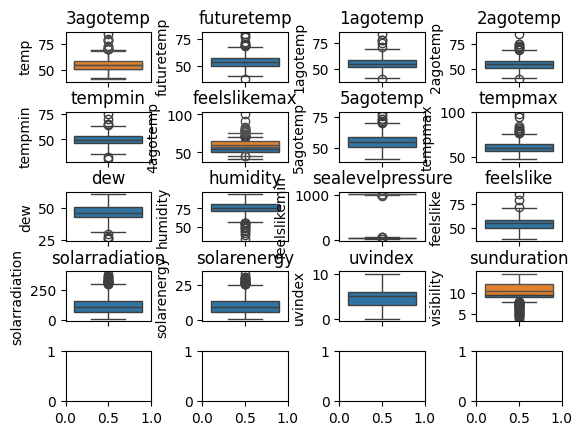

In [14]:
temp = clean_data.loc[:, ['temp', 'futuretemp', '1agotemp', '2agotemp', '3agotemp', '4agotemp', '5agotemp', 'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'sealevelpressure', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'sunduration']]

gif, axes = plt.subplots(5, 4)
plt.subplots_adjust(wspace = .6, hspace = .6)
for i, column in enumerate(temp.columns[0:20]):
  #axes[int(i/5)][i%4].plot(plt.boxplot(temp[column]))
  sns.boxplot(temp[column], ax=axes[int(i/5)][i%4])
  axes[int(i/5)][i%4].set_title(column)
plt.show()

#Regressions

##Correlation between variables
Checked correlation between many variables in JMP statistical software.

###4 Variable Multiple Linear Regression
Variables used: today's temperature, temperature from past two days, and today's sunduration.

In [96]:
# create regression model
lr = LinearRegression()
y = clean_data['futuretemp']
X = clean_data.loc[:, ['temp', '1agotemp', '2agotemp', 'sunduration']]
model = lr.fit(X, y)

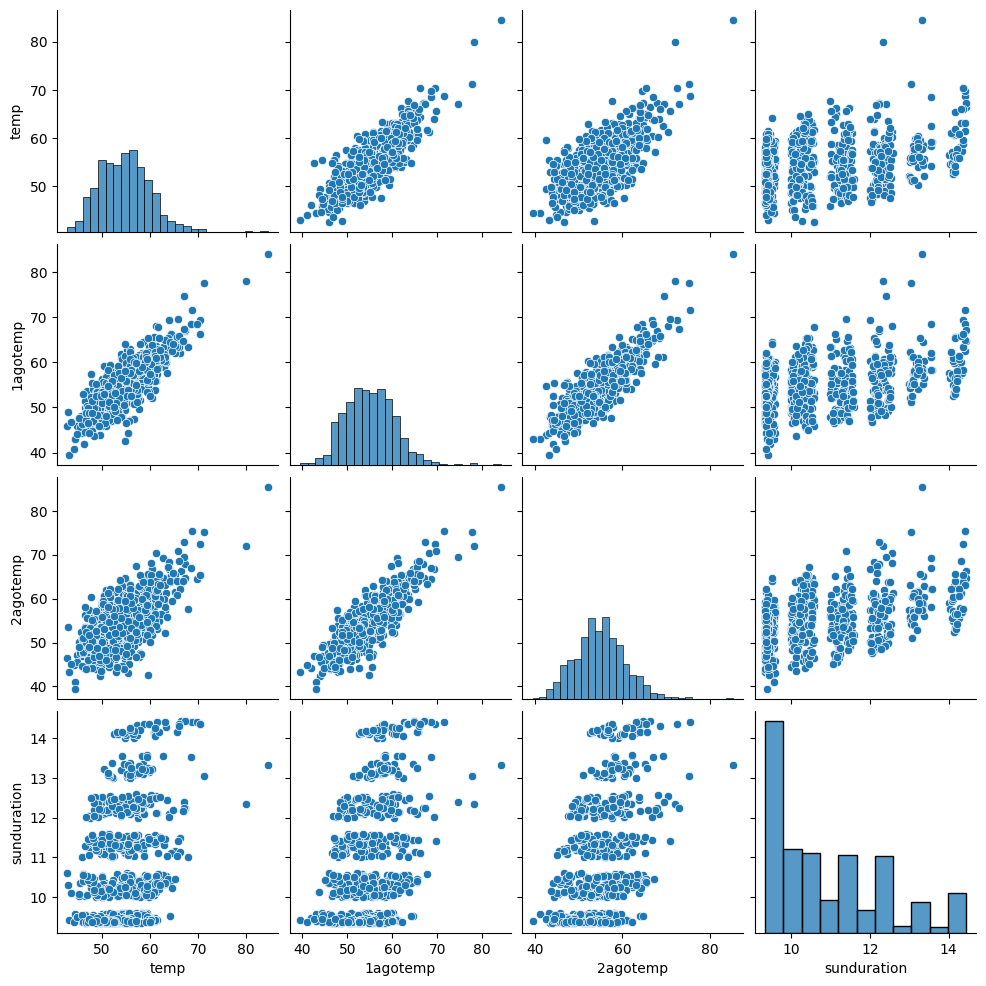

In [98]:
# pair plot of the 4 variables
sns.pairplot(X)
plt.show()

In [99]:
# correlation between variables
X.corr()

,temp,1agotemp,2agotemp,sunduration
temp,1.000000,0.840278,0.675441,0.318914
1agotemp,0.840278,1.000000,0.863774,0.389378
2agotemp,0.675441,0.863774,1.000000,0.445543
sunduration,0.318914,0.389378,0.445543,1.000000


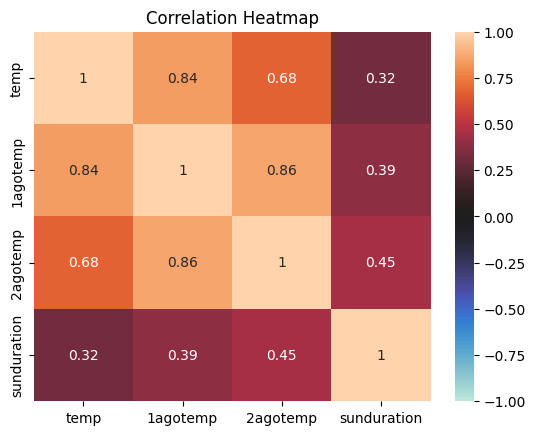

In [100]:
# heat map
sns.heatmap(X.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap")
plt.show()

In [97]:
# get analysis of model
print("Model intercept: ", model.intercept_)
print("Model slope for X1, X2, X3, and X4 respectively: ", model.coef_)

Model intercept:  2.9270349822337636
Model slope for X1, X2, X3, and X4 respectively:  [ 1.02423723 -0.35365977  0.15700545  0.53375115]


Formula: y = *B0* + *B1*X1 + *B2*X2 + *B3*X3
- *B0*: intercept of 2.9270349822337636
- *B1*: temperature slop of 1.02423723
- *B2*: yesterday's temperature slope of -0.35365977
- *B3*: slope for temperature from two days ago is 0.15700545
- *B4*: sun duration slope of 0.53375115

In [101]:
# check R-square, coefficient of determination
print("R-square of model: ", model.score(X, y))

R-square of model:  0.7426680848275492


73.63% of the variation in tomorrow's temperature is explained by today's temperature, tomorrow's temperature, and today's sun duration.

#### Train Model

In [102]:
# split dataset to training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [103]:
model = lr.fit(X_train, y_train)

In [104]:
# get predicted y
y_train_pred = model.predict(X_train)

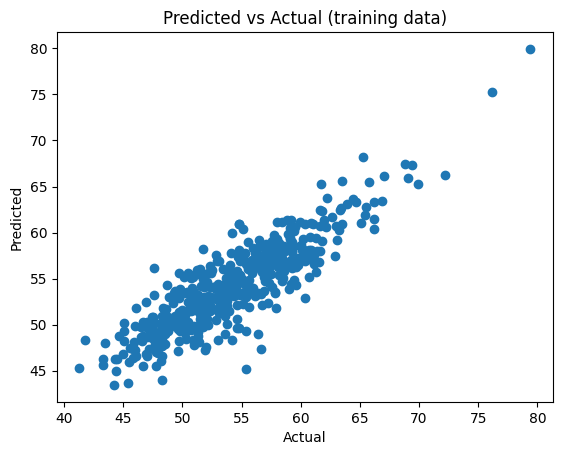

In [105]:
# plot correlation between predicted and actual
plt.plot(y_train, y_train_pred, 'o')
plt.title("Predicted vs Actual (training data)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

####Test Model

In [106]:
# predict future temperature based on testing data
y_test_pred = model.predict(X_test)

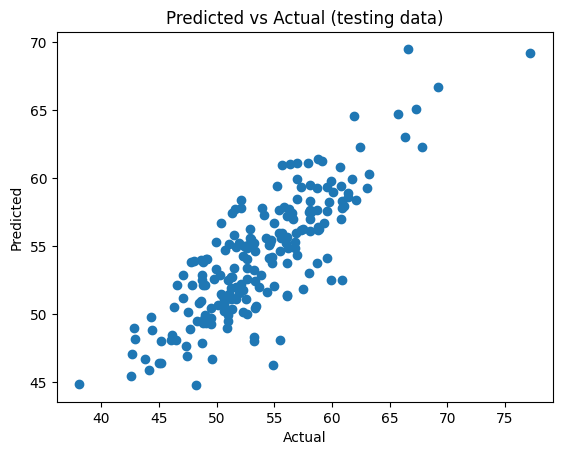

In [107]:
# plot correlation between predicted and actual
plt.plot(y_test, y_test_pred, 'o')
plt.title("Predicted vs Actual (testing data)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

####Check accuracy of model (MAE, R-square)

In [108]:
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Training data MAE: ", mae_train)

Training data MAE:  2.044144819273232


In [109]:
# get R-square
print("Prediction accuracy (R-square) on training data", model.score(X_train, y_train))

Prediction accuracy (R-square) on training data 0.766655588024369


In [110]:
mae_test = mean_absolute_error(y_test, y_test_pred)
print("Testing data MAE: ", mae_test)

Testing data MAE:  2.452781988229112


In [111]:
# get R-square of prediction
print("R-square on testing data", model.score(X_test, y_test))

R-square on testing data 0.6804222535319139
